EXPLICACION UNO: Aquí importamos la librería pandas como pd, y con la funcion read_csv leemos el archivo de la NASA para luego convertirlo en un dataFrame. 
Luego con un .shape imprimimos las dimnsiones del conjunto de datos, es decir, el numero de sus filas y columnas; mientras que df.columns nos enseña los nombres exactos de cada variable. Implementando df.head(15) desplegamos las primeras 15 filas, con el fin de verificar los datos importados de manera correcta.

In [6]:
import pandas as pd 
df=pd.read_csv("NASA.csv")
print(df.shape)
print(df.columns)
print(df.head(15))

(1503, 6)
Index(['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion'], dtype='object')
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       1600

EXPLICACION DOS: En este bloque dvidimos el conjunto en dos partes 70% para entrenar el modelo y 30% para validarlo. Lo logramos con la funcion df.sample(frac=0.7) esto para seleccionar de manera aleatoria las observaciones, y con df.drop(train.index) formamos el conjunto de prueba.
Imprimimos en consola las dimensiones de cada conjunto con un .shape y con una suma confirmamos que la suma de dimensiones corresponda a 1503.

In [7]:
train=df.sample(frac=0.7)
test=df.drop(train.index)
print("Train:",train.shape)
print("Test:",test.shape)
sum=train.shape[0]+test.shape[0]
print("Suma train+test:",sum)
print(train.head(15))

Train: (1052, 6)
Test: (451, 6)
Suma train+test: 1503
      frecuencia  angulo  longitud  velocidad   espesor  presion
1198         400    17.4    0.0254       31.7  0.017663  120.766
248         1250     2.0    0.2286       71.3  0.002930  128.816
1271        1250     0.0    0.1016       39.6  0.001463  132.271
109         6300     3.0    0.3048       71.3  0.004257  116.134
511          630     2.7    0.1524       71.3  0.002439  127.404
289          800     2.0    0.2286       31.7  0.003724  130.307
439          250     7.3    0.2286       31.7  0.013267  130.089
657         3150     9.9    0.1524       55.5  0.020844  115.085
748         8000     0.0    0.0508       55.5  0.000762  130.156
391          250     7.3    0.2286       71.3  0.010440  139.918
1434        1600    12.3    0.1016       55.5  0.036823  121.824
477         4000     0.0    0.1524       55.5  0.001727  127.233
362          630     5.3    0.2286       71.3  0.005194  131.800
403         4000     7.3    0.2286  

EXPLIACION TRES: En esta parte construimos el modelo que nos ayudara a predecir el nivel  de presión sonora a partir de nuestras otras cinco varables. Separamos la variable dependiente (presion) de las independientes (el resto); con statsmodels.api usamos el método de OLS que nos ayudara a ajustar los coeficientes beta de la regresión lineal múltiple.
Aplicamos la función de results.summary() para obtener una tabla con los coeficientes estimados de cada variable, SE, R2, p-values, etc.
Como los p-values nos pueden dar 0.000, utilizamos la funcion de results.pvalues para generarlos manualmente con cifras significativas y los imprimimos.

In [8]:
import statsmodels.api as sm 
X=train.drop('presion',axis=1)
Y=train.presion
model=sm.OLS(Y,sm.add_constant(X))
results=model.fit()
yHat=results.predict(sm.add_constant(X))
print(results.summary())
print("\np-values con cifras significativas:\n",results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          4.78e-160
Time:                        21:00:23   Log-Likelihood:                -3130.8
No. Observations:                1052   AIC:                             6274.
Df Residuals:                    1046   BIC:                             6303.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.7965      0.654    203.195      0.0

EXPLIACION CUATRO:Una vez que entrenamos el modelo, debemos analizar si nuestras variables, tienen un efecto real sobre la variable dependiente, que en este caso es la presión sonora. Para poder evaluar esto nos basamos en los p-values que acompañan cada coeficiente en la tabla. 
El p-value mide la probabilidad de obtener un coeficiente tan extremo como el observado, podemos suponer que el coeficiente es cero, como la hipótesis nula: la variable no influye. Si el p-value es bajo (normalmente menor a 0.05), tenemos evidencia suficiente para rechazar la hipótesis nula y concluir que esta variable sí aporta información al modelo.
Si vemos la tabla podemos afirmar que sí existe al menos una variable significativa, ya que no todos los p-values son altos.
Además al observar nuestra R2 vemos que explican alrededor de 1/2 parte del modelo, de otro modo si fuera en su totalidad tendría un valor de 1; con esto podemos afirmar que todas nuestras variables explican este de manera correcta, pero habría mas elementos que podrian explicarnos mejor el modelo lineal.

EXPLICACION CINCO: Calculamos el Residual Standard Error y la R2 tanto en el conjunto de entrenamiento como en el de prueba.
Para entrenamiento aprovechamos statsmodels y su funcion de results.scale que es una varianza de residuos y el results.rsquared. 
En el conjunto de prueba obtenemos las predicciones del modelo y con estas calculamos el RSS que es la suma de cuadrados de los errores, el TSS siendo la suma total de cuadrados con respecto a la media y finalmente RSE y R2 de prueba. 
Estos indicadores nos permiten comparar el ajuste interno contra la capacidad de generalizar.
Si el R2 de entrenamiento es alto pero bajo en prueba, nos indicaría un sobreajuste, en cambio, si ambas son consistentes podemos decir que el modelo captura relaciones reales entre las variables de aerodinámica y presión sonora.

In [9]:
import numpy as np
print("RSE entrenamiento:",np.sqrt(results.scale))
print("R^2 entrenamiento: ", results.rsquared)

xtest=test.drop('presion',axis=1)
yhat=results.predict(sm.add_constant(xtest))
ytest=test.presion
RSStest=np.sum((ytest-yhat)**2)
TSSTest = np.sum((ytest-np.mean(ytest))**2)
n=xtest.shape[0]
m=xtest.shape[1]
RSETest = np.sqrt(RSStest/(n-m-1))
R2Test=1-(RSStest/TSSTest)

print("\nRSE test:",RSETest)
print("R^2 test: ", R2Test)


RSE entrenamiento: 4.758497974070227
R^2 entrenamiento:  0.511752516955465

RSE test: 4.962321400127014
R^2 test:  0.5222302801173699


EXPLICACION SEIS: Por último generamos una gráfica de dispersión con la librería de matplotlib.pyplot, en el eje x ponemos los valores reales de la presión sonora del conjunto de prueba y en el eje y las predicciones del modelo.
También dibujamos una línea y=x que representa la situación ideal en la que los valores predichos son iguales a los reales.
Supondríamos que el modelo es perfecto si todos los puntos se ubicaran sobre la línea; mientras más cerca estén los puntos de esa recta, mejor es la capacidad predictiva.

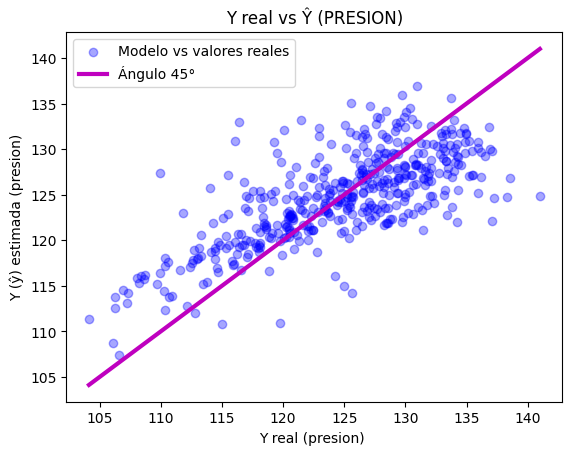

In [10]:
import matplotlib.pyplot as plt
lims = [min(ytest.min(), yhat.min()), max(ytest.max(), yhat.max())]
plt.scatter(ytest,yhat,alpha=0.35, label='Modelo vs valores reales',c='b')
plt.plot(lims, lims,linewidth=3,c='m', label='Ángulo 45°')
plt.xlabel("Y real (presion) ")
plt.ylabel("Y (ŷ) estimada (presion)")
plt.title("Y real vs Ŷ (PRESION)")
plt.legend()
plt.show()